<a href="https://colab.research.google.com/github/Alejo487/Pruebas_de_comparacion_de_algoritmos/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Matriz de Confusión:
[[435   9]
 [ 14 225]]


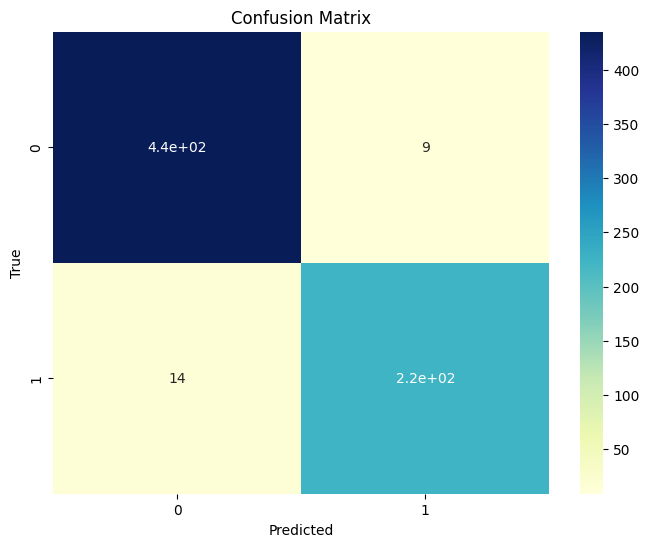


Reporte de Clasificación:
              precision    recall  f1-score   support

           2       0.97      0.98      0.97       444
           4       0.96      0.94      0.95       239

    accuracy                           0.97       683
   macro avg       0.97      0.96      0.96       683
weighted avg       0.97      0.97      0.97       683

Exactitud (Accuracy): 0.9663250366032211


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

# Cargar tu conjunto de datos (reemplaza 'cancer.csv' con tu archivo CSV)
data = pd.read_csv('cancer.csv')

# Separar características (X) y etiquetas (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Escalar las características para mejorar el rendimiento del kNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un kNN
knn = KNeighborsClassifier(n_neighbors=10)

# Usar cross_val_predict para obtener predicciones usando validación cruzada
y_pred = cross_val_predict(knn, X_scaled, y, cv=10)

# Matriz de confusión
cm = confusion_matrix(y, y_pred)

# Imprimir matriz de confusión
print("\nMatriz de Confusión:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas de rendimiento
print("\nReporte de Clasificación:")
print(classification_report(y, y_pred))

print("Exactitud (Accuracy):", accuracy_score(y, y_pred))